# Life Expectency & GDP #

In [2]:
# import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Inspecting the dataset for the first time.

In [26]:
who_data = pd.read_csv("all_data.csv")
print(f"Columns: {who_data.columns.tolist()}\n")
#print(who_data.head())
#print(who_data.dtypes)
#print(who_data.isnull().count())

Columns: ['Country', 'Year', 'Life expectancy at birth (years)', 'GDP']



Running summary statistics on the numerical columns.
Viewing the unique values of the categorical columns

In [9]:
print(f"Countries in the dataset: {who_data.Country.unique()}\n")
print(f"Life expectancy statistics:\n{who_data['Life expectancy at birth (years)'].describe()}\n")
print(f"GDP statistics:\n{who_data['GDP'].describe()}\n")
print(f"Time range in our dataset: \n{who_data.Year.min()} to {who_data.Year.max()}")

Countries in the dataset: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']

Life expectancy statistics:
count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64

GDP statistics:
count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64

Time range in our dataset: 
2000 to 2015


The data appears well cleaned.
The columns are even formatted!
Gross Domestic Product is given in U.S Dollars
Initially I thought had a country from every continent however, missing Australasia

I will rename the columns to remove capitalisation and make analysis easier

In [21]:
who_data.GDP = who_data.GDP /1e9
who_data.rename(columns={"Life expectancy at birth (years)":'life_expectancy', "GDP":'gdp_billions_usd', "Year":'year', "Country":'country'}, inplace=True)
who_data.country = who_data.country.apply(lambda x: 'USA' if x == "United States of America" else x)

In [24]:
print(f"New Columns: \n{who_data.columns.tolist()}")

New Columns: 
['country', 'year', 'life_expectancy', 'gdp_billions_usd']


Think we need to make some initial visualisations of life expectancy vs year with hue = country with a similar visualisation for GDP...

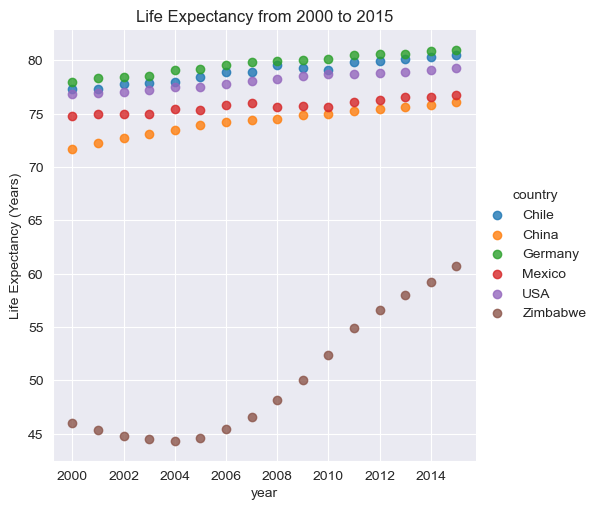

<Figure size 640x480 with 0 Axes>

In [22]:
sns.lmplot(x="year", y="life_expectancy", hue="country", data=who_data, fit_reg=False)
plt.title("Life Expectancy from 2000 to 2015")
plt.ylabel("Life Expectancy (Years)")
plt.show()
plt.clf()

Zimbabwe's life expectancy is significantly lower than the other 5 countries.
There's also a dip in 2004. Would be interesting to find out what was happening in Zimbabwe politically/economically in 2004
We need to separate our visualisations.

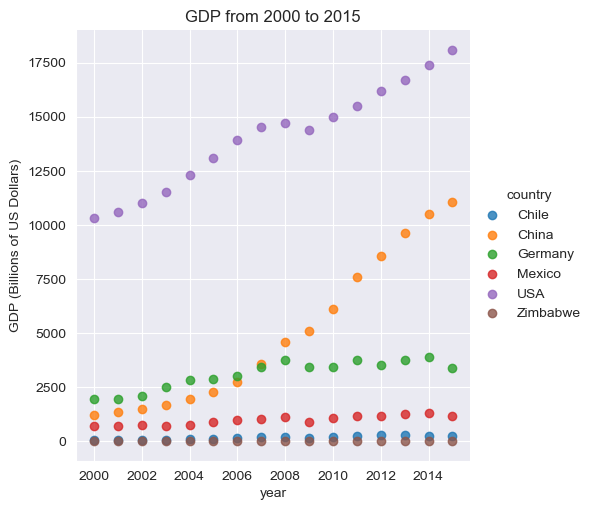

<Figure size 640x480 with 0 Axes>

In [25]:
sns.lmplot(x="year", y="gdp_billions_usd", hue="country", data=who_data, fit_reg=False)
plt.title("GDP from 2000 to 2015")
plt.ylabel("GDP (Billions of US Dollars)")
plt.show()
plt.clf()

GDP has been displayed in the trillions of US dollars (10^13).
It's very difficult to see the relative growth of Chile, Mexico and Zimbabwe on this scale.

Could be an interesting exercise to have China go up against the USA